array([<AxesSubplot:ylabel='DEU'>, <AxesSubplot:ylabel='GBR'>,
       <AxesSubplot:ylabel='SWE'>, <AxesSubplot:ylabel='ITA'>],
      dtype=object)

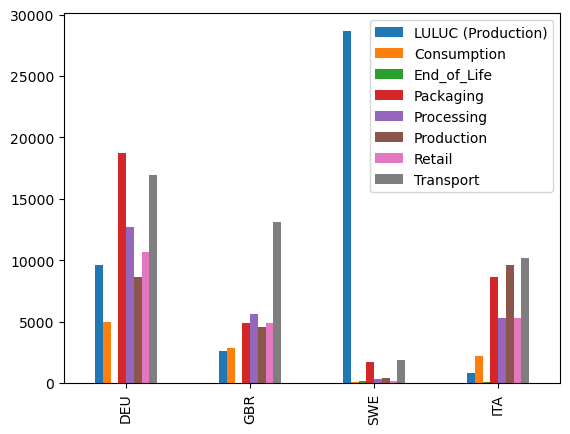

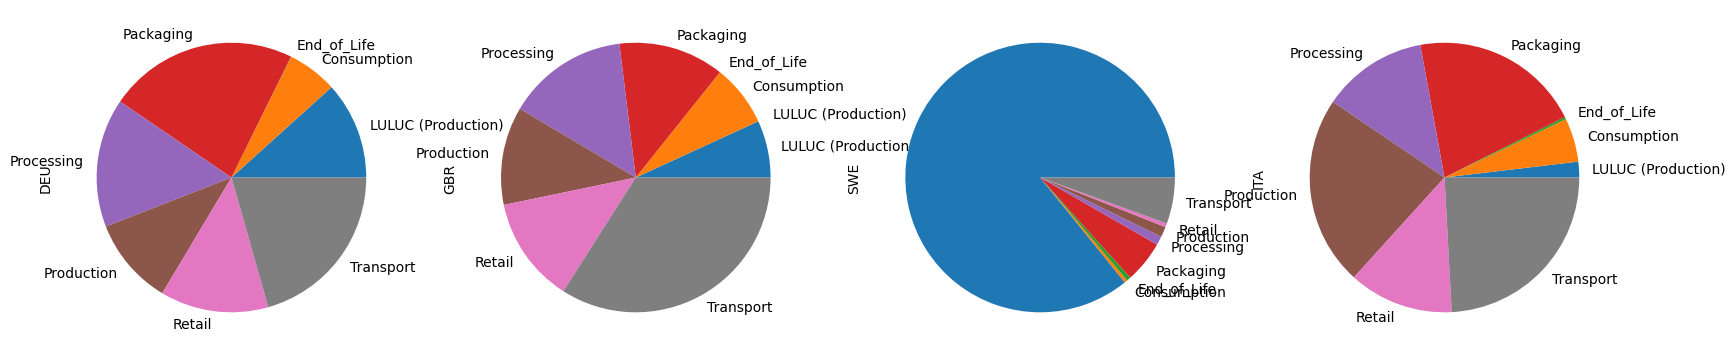

In [184]:
import pandas as pd
import matplotlib.pyplot as plt

df_edgar_sector = pd.read_csv('input/food-by-sector.csv', sep=";", decimal=',')

df_edgar_sector.columns = df_edgar_sector.columns.str.replace("Y_", "")

years = ['1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018']

oecd_countries = df_edgar_sector['C_group_IM24_sh'] == '11:_OECD_Europe'  
co2 = df_edgar_sector['Substance'] == 'GWP_100_CO2'  

df_edgar_sector.loc[oecd_countries & co2]

data_f = pd.DataFrame({
    'Country': df_edgar_sector.loc[oecd_countries & co2]['Country_code_A3'],
    'Year': df_edgar_sector.loc[oecd_countries & co2]['2018'],
    'Sector': df_edgar_sector.loc[oecd_countries & co2]['FOOD_system_stage']
})

data_1 = data_f.set_index('Country')
sectors = data_1['Sector'].unique()
countries = ['DEU', 'GBR', 'SWE', 'ITA']

b_data_f = {}
ls = pd.DataFrame(b_data_f, index=countries)

for sector in sectors:
    for country in countries: 
        sect = data_f['Sector'] == sector
        cou = data_f['Country'] == country
        t = data_f.loc[sect & cou]
        
        if len(t['Year'].values) > 0:
            ls.at[country, sector]= t['Year'].values[0] 
        else: 
           ls.at[country, sector] = 0 


ls.plot(kind='bar')

ls.swapaxes("index", "columns").plot(kind='pie', subplots=True, legend=False, figsize=[20,20])




In [87]:
import pandas as pd
import matplotlib.pyplot as plt

df_edgar_sector = pd.read_csv('input/food-by-sector.csv', sep=";", decimal=',')

df_edgar_sector.columns = df_edgar_sector.columns.str.replace("Y_", "")

years = ['1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018']

oecd_countries = df_edgar_sector['C_group_IM24_sh'] == '11:_OECD_Europe'
luluc = df_edgar_sector['FOOD_system_stage'] == 'LULUC (Production)'
co2 = df_edgar_sector['Substance'] == 'GWP_100_CO2'
data_frame = {'Country': df_edgar_sector.loc[oecd_countries & luluc & co2]}

for year in years:
       data_frame[year] = df_edgar_sector.loc[oecd_countries & luluc & co2][year] 


data = pd.DataFrame(data_frame)

swapped_data = data.set_index('Country')

swapped_data.swapaxes("index", "columns").plot(title="LuLuc in OECD Countries since 1990")




TypeError: no numeric data to plot

In [72]:
df_edgar_shares = pd.read_csv('input/food-system-shares.csv', sep=";", decimal=',')

df = df_edgar_shares.astype({'Country_code_A3': 'string'})

biggest_economies = ['CHN', 'USA', 'JPN', 'GBR', 'IND', 'FRA', 'ITA']
developing_economies = ['BGD', 'VNM', 'MMR', 'TKM', 'UZB', 'BTN', 'LAO']

def getPlotData(code):
   tmp_data = df[df['Country_code_A3'] == code] 
   changed_axis = tmp_data.swapaxes("index", "columns") 
   return changed_axis[tmp_data.index.to_list()[0]]

data_frame = {}
developing_economies_frame = {}

for economie in biggest_economies: 
    data = getPlotData(economie)
    data_frame[economie] = data

for economie in developing_economies: 
    data = getPlotData(economie)
    developing_economies_frame[economie] = data


x = ['1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018']


data = pd.DataFrame(data_frame, index=x)
data
# data_developing = pd.DataFrame(developing_economies_frame, index=x)

# data.plot(title="Share of emission in the biggest countries")
# data_developing.plot(title="Share of emission in the developing countries")

,CHN,USA,JPN,GBR,IND,FRA,ITA
1990,0.466479,0.186219,0.17247,0.210783,0.673136,0.320391,0.232647
1991,0.453069,0.189545,0.17179,0.206041,0.655397,0.308948,0.230601
1992,0.43692,0.188699,0.170848,0.210952,0.649365,0.312181,0.231722
1993,0.411583,0.185252,0.170991,0.215637,0.642737,0.322696,0.228652
1994,0.40028,0.185052,0.166694,0.220876,0.629519,0.326898,0.230104
1995,0.393879,0.197277,0.163702,0.221164,0.613449,0.32344,0.220143
1996,0.381955,0.195879,0.160604,0.218168,0.602783,0.316898,0.225084
1997,0.381445,0.192412,0.159727,0.220335,0.588989,0.322148,0.222915
1998,0.379983,0.189996,0.161489,0.21661,0.589165,0.320518,0.222109
1999,0.381814,0.188997,0.159296,0.217167,0.568534,0.330957,0.224913


In [ ]:
smallest_submission_per_year = {
       'year': years,
       'highest': df_edgar.loc[df_edgar[years].idxmin()]['Name'],
}

pd.DataFrame(smallest_submission_per_year)

In [124]:


biggest_submission_per_year = {
       'year': years,
       'first': df_edgar.loc[df_edgar[years].idxmax()]['Name'],
}

pd.DataFrame(biggest_submission_per_year)



,year,first
28,1990,Brazil
28,1991,Brazil
28,1992,Brazil
28,1993,Brazil
28,1994,Brazil
28,1995,Brazil
28,1996,Brazil
92,1997,Indonesia
28,1998,Brazil
28,1999,Brazil


<AxesSubplot:title={'center':'Global food system emissions (1990-2018)'}, ylabel='GHG Emissions'>

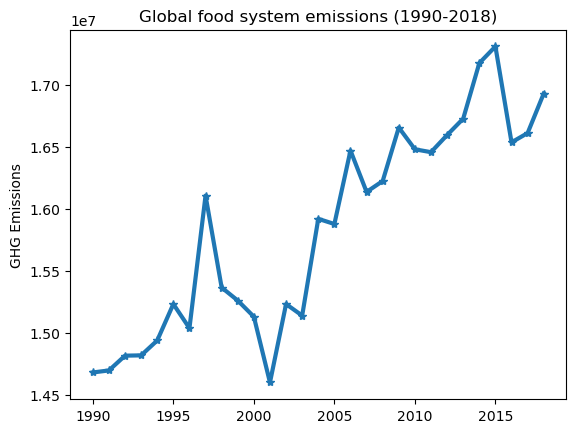

In [7]:
years = ['1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003','2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018']
sum_per_year = df_edgar[years].sum()

sum_per_year.plot(title="Global food system emissions (1990-2018)",
    ylabel="GHG Emissions",
    linewidth=3, marker='*')



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_edgar = pd.read_csv('input/food-system-emission.csv', sep=";", decimal=',')


# remove prefix 'Y_'
df_edgar.columns = df_edgar.columns.str.replace("Y_", "")
print(df_edgar.columns)



Index(['Country_code_A3', 'Name', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018'],
      dtype='object')


In [92]:
df_edgar.reset_index()
df_edgar['1990'].max()

1857857.2203691

In [21]:
df_edgar

,Country_code_A3,Name,Y_1990,Y_1991,Y_1992,Y_1993,Y_1994,Y_1995,Y_1996,Y_1997,...,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018
0,ABW,Aruba,"52,4675868999585","58,4457791874834","66,7025578695407","62,3015040891438","68,506352603572","75,8292645494941","58,7343848749362","81,162564111356",...,"159,364419758244","141,075838191717","135,129301128222","173,603909145523","169,526160796243","172,058515980582","169,902421185516","172,877400540418","158,317865306579","154,667161853689"
1,AFG,Afghanistan,"10625,1078666089","10830,8811038816","10950,5367322995","11171,8215005548","11299,5948737813","11815,2676021596","13155,1591117898","14252,9548398917",...,"18810,3985339849","20963,7973332128","21558,2331577684","21216,8187994985","20942,2067871934","21451,7301949409","21147,5387815796","21050,7782668807","21302,7083655574","21196,1321465138"
2,AGO,Angola,"32156,5967601987","32464,2352784907","32567,3882878683","32602,1462769302","34115,3533369318","34801,9652237728","40930,1266545059","40057,6157206137",...,"65693,1041421434","67693,4672065217","66277,3662764767","67652,0874103944","67200,2776122588","68146,5812239629","69470,3412290083","69064,5576030591","71539,3427226862","66445,7513148108"
3,AIA,Anguilla,"2,72660843034238","3,00926747996433","3,13016865032473","3,40682692148824","3,93245663176977","4,4882185430301","4,49325958269214","4,19468924504846",...,"5,79550711413961","6,37305359794505","6,6605446672241","6,70542029420152","6,99323191698269","7,02791041579225","7,07879591453168","7,15916955895995","7,2726950699808","7,18154440103569"
4,AIR,Int. Aviation,"1322,24842678094","1285,26816767161","1325,9680029429","1352,13142967059","1424,83870178853","1481,4168510297","1541,11234572132","1620,1906991602",...,"2216,41330977931","2339,39990129912","2426,22218550791","2445,36642273752","2487,01553638258","2570,11498963027","2712,21896430472","2831,8835653271","2990,77393301036","3116,25704561934"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,WSM,Samoa,"290,512354092438","289,997515842348","285,387322696192","289,780474504623","291,786046153845","288,328443213448","288,244240647901","289,632853491365",...,"311,323208799998","323,402693173592","348,916497587257","343,480278511705","347,314610221933","353,513520449962","376,688599222832","359,397828424047","370,633244880035","372,112812232132"
219,YEM,Yemen,"7794,38063825187","7908,60216534544","8182,37293898035","8423,80175444628","8887,4527321506","9470,02909430151","10014,6662914632","10670,3286426175",...,"19073,2217392147","19282,7366173302","18811,8735340768","18428,6048885773","20329,4782404639","20610,0394838844","17540,0693477829","17252,5886616376","17614,9951471745","18560,1616344619"
220,ZAF,South Africa,"77801,9661520347","77864,9288094314","77285,0981430051","76910,2059247796","78758,7378545446","80443,4666472158","81997,7558704008","83449,9889543497",...,"103471,998693983","102818,702147203","104366,359233003","105817,538784067","107756,800262768","108612,774825662","107605,876048149","107160,431744165","111095,178574091","110973,875397336"
221,ZMB,Zambia,"42792,3491758288","43022,19937957","43007,0087593724","42850,8284247674","42472,6040338433","42129,659453783","36655,2984802949","37255,153033413",...,"44450,0860446392","48009,8622148144","62564,6996287276","64659,4971547469","65265,0308569711","65948,2207499367","69639,3035012341","68264,0574671514","69489,2616469269","67302,8770383357"
